# Exploratoy Analysis

This notebook contains the exploratory analysis of the zonaprop's apartments on rent data.

We will see how is the data, what are the features, and how we can use them to predict the price of an apartment.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [2]:
data_path = '..\data\departamentos-alquiler-2022-10-05-00-48-24.csv'

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.head()

,url,POSTING_CARD_GALLERY,price_value,price_type,expenses_value,expenses_type,location,square_meters_area_0,square_meters_area_1,rooms_0,bedrooms_0,bathrooms_0,description,parking_0,ha
0,/propiedades/departamento-centro-50423957.html,NaN,85000,$,18000,$,"Centro / Microcentro, Capital Federal",65.0,60.0,4.0,3.0,1.0,Amplio departamento al frente con balcón corri...,NaN,NaN
1,/propiedades/kennedy-y-demaria-49060887.html,NaN,3500,USD,164000,$,"Palermo Chico, Palermo",267.0,241.0,8.0,4.0,4.0,Lindisimo Duplex. Piso alto. Excelente edifici...,3.0,NaN
2,/propiedades/departamento-en-venta-con-renta-d...,NaN,1000,USD,12500,$,"Nordelta, Tigre",94.0,94.0,3.0,2.0,3.0,Excelente departamento en alquiler de 3 ambien...,1.0,NaN
3,/propiedades/piso-22-torre-con-amenities-50313...,NaN,3500,USD,110000,$,"Belgrano, Capital Federal",286.0,NaN,4.0,3.0,2.0,"Piso 22, Teodoro García esquina Villanueva, es...",2.0,NaN
4,/propiedades/departamento-terrazas-al-golf-mal...,NaN,1000,USD,35000,$,"Pilara, Pilar",113.0,97.0,3.0,2.0,2.0,"Muy lindo departamento en Pilara, Terrazas al ...",2.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15464 entries, 0 to 15463
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   15464 non-null  object 
 1   POSTING_CARD_GALLERY  0 non-null      float64
 2   price_value           15464 non-null  object 
 3   price_type            14878 non-null  object 
 4   expenses_value        9583 non-null   object 
 5   expenses_type         9318 non-null   object 
 6   location              15464 non-null  object 
 7   square_meters_area_0  14581 non-null  float64
 8   square_meters_area_1  13867 non-null  float64
 9   rooms_0               14587 non-null  float64
 10  bedrooms_0            13614 non-null  float64
 11  bathrooms_0           14987 non-null  float64
 12  description           15408 non-null  object 
 13  parking_0             7241 non-null   float64
 14  ha                    11 non-null     float64
dtypes: float64(8), obje

We see that the price_value column is of type object, so we need to convert it to float.

In [6]:
# Drop no casteable to float price values
import re
df = df[df.price_value.apply(lambda x: re.match(r'\d+\.?\d+', str(x)) is not None)]

In [7]:
df['price_value'] = df.price_value.astype(float)

In [8]:
print(f'Rows quantity: {len(df)}')

Rows quantity: 14878


We have to clean nan data of some columns.

In [9]:
df.isna().sum()

url                         0
POSTING_CARD_GALLERY    14878
price_value                 0
price_type                  0
expenses_value           5397
expenses_type            5649
location                    0
square_meters_area_0      765
square_meters_area_1     1464
rooms_0                   806
bedrooms_0               1782
bathrooms_0               436
description                55
parking_0                7989
ha                      14867
dtype: int64

In [10]:
df.drop(columns=['POSTING_CARD_GALLERY'], inplace=True)

In [11]:
df.dropna(subset=['square_meters_area_0', 'square_meters_area_1'], inplace=True)

Clean "ha" useless column.

In [12]:
df.drop(columns=['ha'], inplace=True)

There are two columns asociated to the area of the apartment, these correspond to the total area and the covered area.

We have to use the minimun value between the two columns to set the covered area and the maximum value to set the total area.

In [13]:
# Create columns with max and min area using the two columns with area values
df.loc[:, 'covered_area'] = df[['square_meters_area_0', 'square_meters_area_1']].min(axis=1)
df.loc[:, 'total_area'] = df[['square_meters_area_0', 'square_meters_area_1']].max(axis=1)

# Data Analysis

Let's see the distribution of the area of the apartments.

In [14]:
def get_df_column_by_quantile(df, column, quantile):
    return df[df[column] < df[column].quantile(quantile)][column]

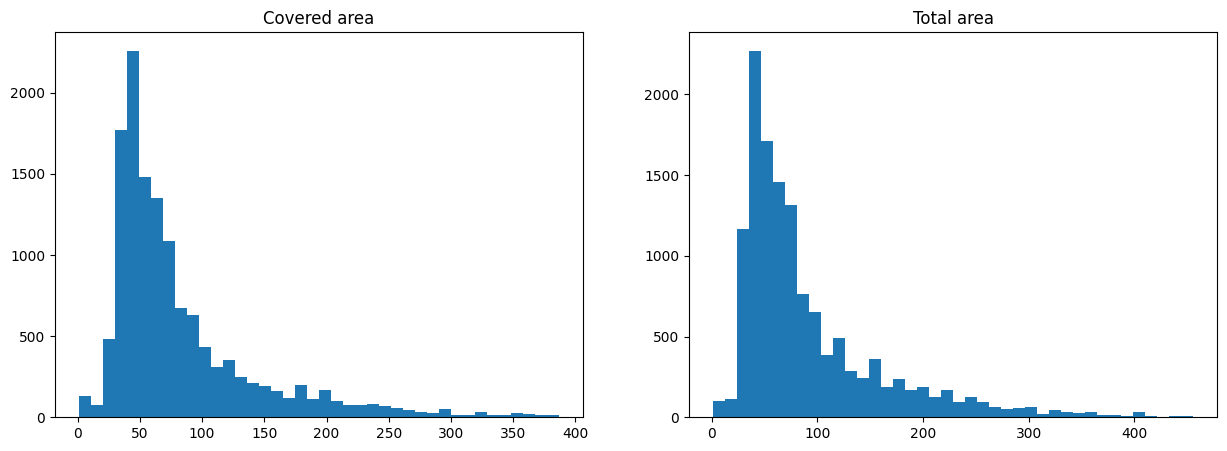

In [15]:
from matplotlib import pyplot as plt

df_data = df[(df.covered_area < df.covered_area.quantile(.99)) & (df.total_area < df.total_area.quantile(.99))]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df_data.covered_area, bins=40)
axs[0].set_title('Covered area')

axs[1].hist(df_data.total_area, bins=40)
axs[1].set_title('Total area')

plt.show()

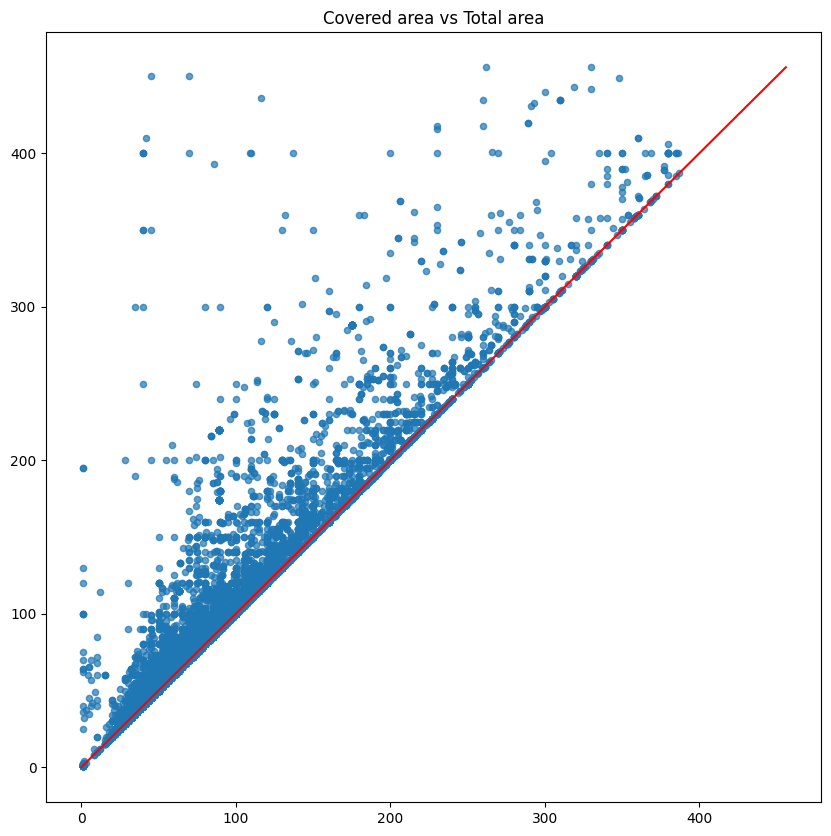

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(df_data.covered_area, df_data.total_area, alpha=0.7, s=20)

max_total_area = df_data.total_area.max()

plt.plot([0, max_total_area], [0, max_total_area], color='red')
plt.title('Covered area vs Total area')
plt.show()

Now we can see the distribution of the price of the apartment in function of the area.

We will analyze only the apartments with price_type = $. (The price is in argentinian pesos)

In [131]:
price_types = df.price_type.unique()

print(f'Price types: {price_types}')

Price types: ['$' 'USD']


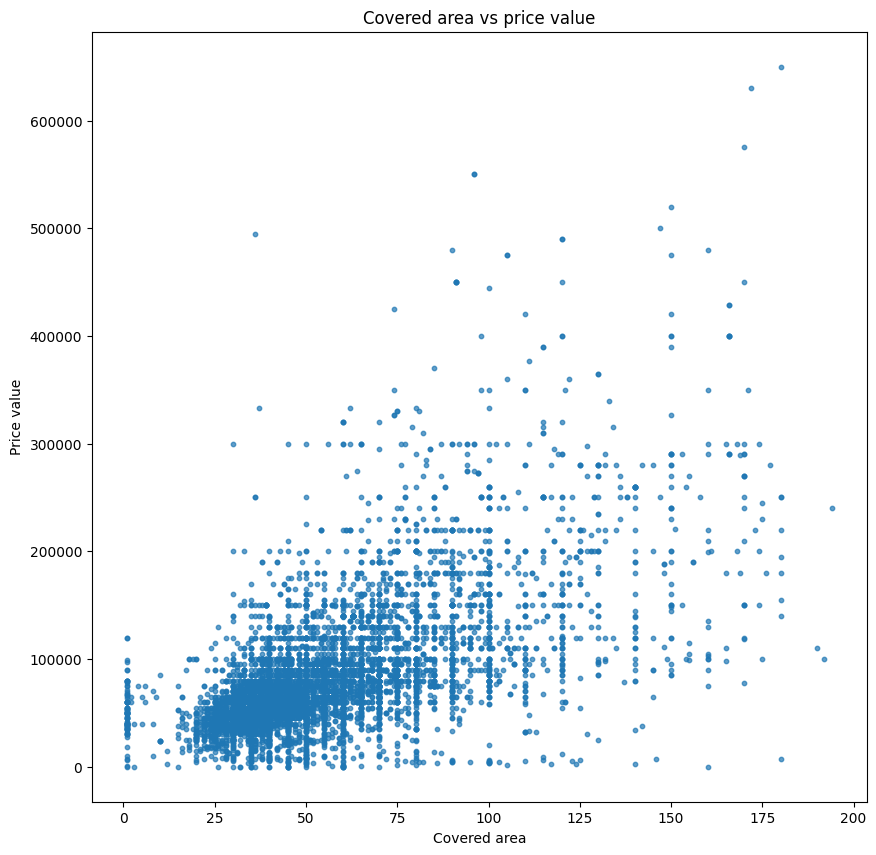

In [133]:
df_pesos = df[df['price_type'] == '$']

df_pesos_data = df_pesos[
    (df_pesos.covered_area < df_pesos.covered_area.quantile(.99))
    & (df_pesos.total_area < df_pesos.total_area.quantile(.99))
]

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df_pesos_data['covered_area'], df_pesos_data['price_value'], alpha=0.7, s=10)
ax.set_title('Covered area vs price value')

ax.set_xlabel('Covered area')
ax.set_ylabel('Price value')

plt.show()


We can see that the price of the apartment increases with the area.

Let's see the distribution of the price of the apartment in function of the rooms.

First at all, let's see the distribution of the price_value.

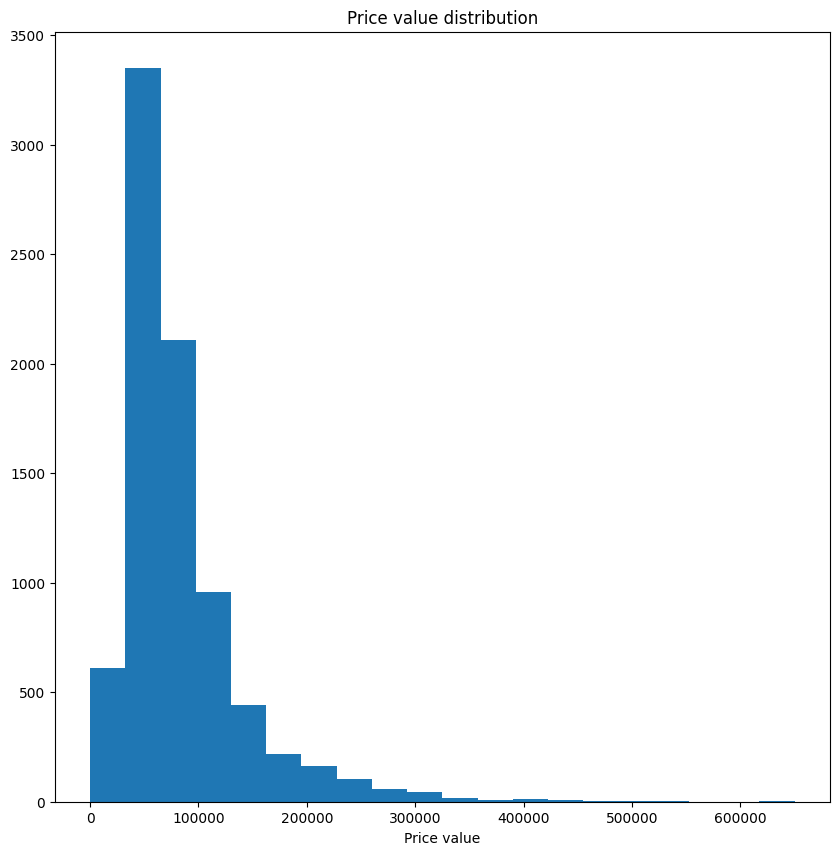

In [135]:
plt.figure(figsize=(10, 10))
plt.hist(df_pesos_data['price_value'], bins=20)
plt.title('Price value distribution')
plt.xlabel('Price value')
plt.show()

And now let's see the distribution of the price of the apartment in function of the rooms.

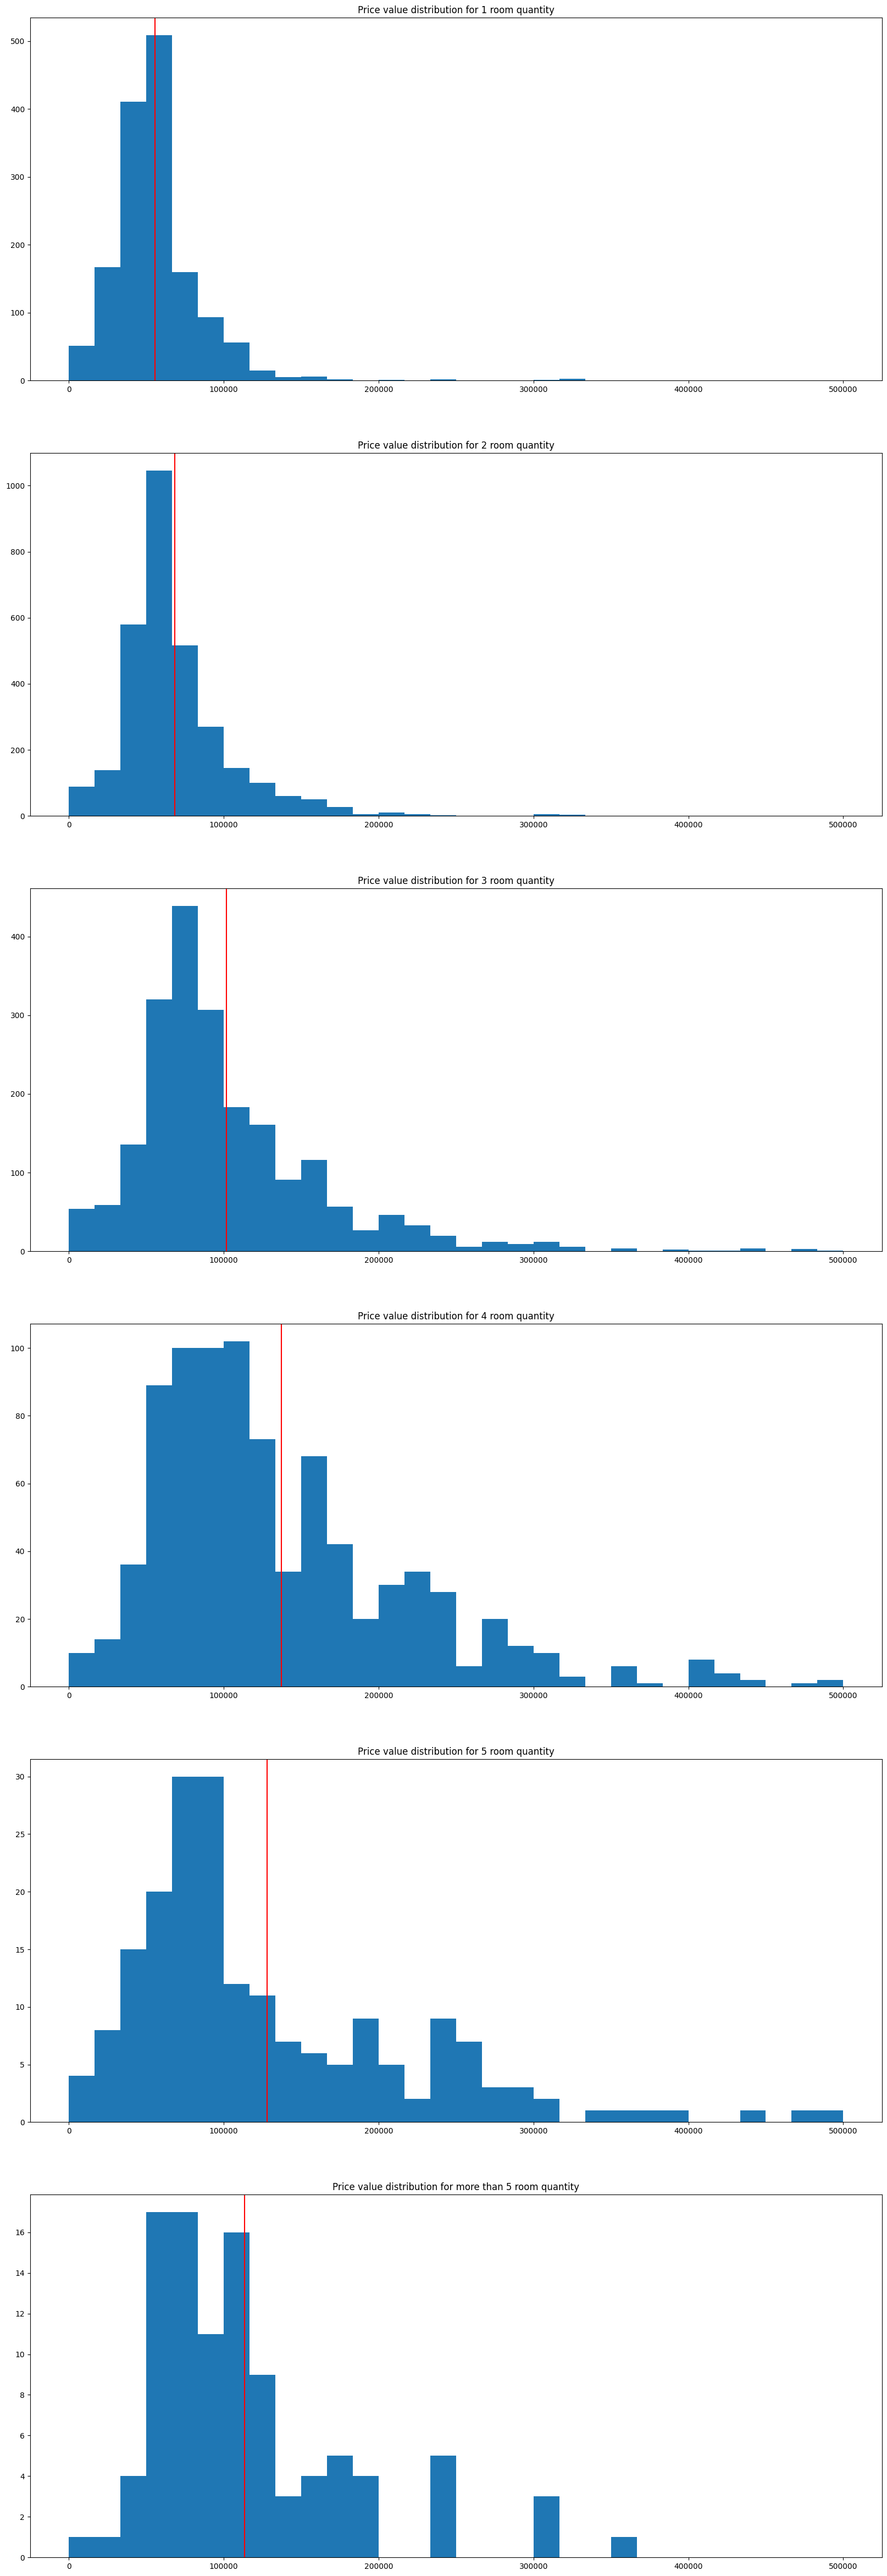

In [136]:
df_data = df_pesos_data[df_pesos_data['rooms_0'] < 30]


fig, axs = plt.subplots(6, 1, figsize=(20, 60))

rest_of_room_quantity_df = df_data[df_data['rooms_0'] > 5]

for i in range(1, 6):

    room_quantity_df = df_data[df_data['rooms_0'] == i]

    axs[i-1].hist(room_quantity_df['price_value'], bins=30, range=(0, 500000))
    axs[i-1].set_title(f'Price value distribution for {i} room quantity')
    axs[i-1].axvline(room_quantity_df['price_value'].mean(), color='red')

axs[5].hist(rest_of_room_quantity_df['price_value'], bins=30, range=(0, 500000))
axs[5].set_title(f'Price value distribution for more than 5 room quantity')
axs[5].axvline(rest_of_room_quantity_df['price_value'].mean(), color='red')

plt.show()


We can see that the price value mean increases with the number of rooms until 4 rooms, and then it doesn't increase anymore and it even decreases.

Let´s continue with the correlation analysis.

There are some columns that are not useful for the analysis, so we will not use them.

We will use the columns defined below.

In [137]:
columns_to_analize = ['price_value', 'covered_area', 'total_area', 'rooms_0', 'bathrooms_0', 'bedrooms_0', 'parking_0']

In [138]:
columns_renames = {
    'price_value': 'price',
    'covered_area': 'covered area',
    'total_area': 'total area',
    'rooms_0': 'rooms',
    'bathrooms_0': 'bathrooms',
    'bedrooms_0': 'bedrooms',
    'parking_0': 'parking'
}

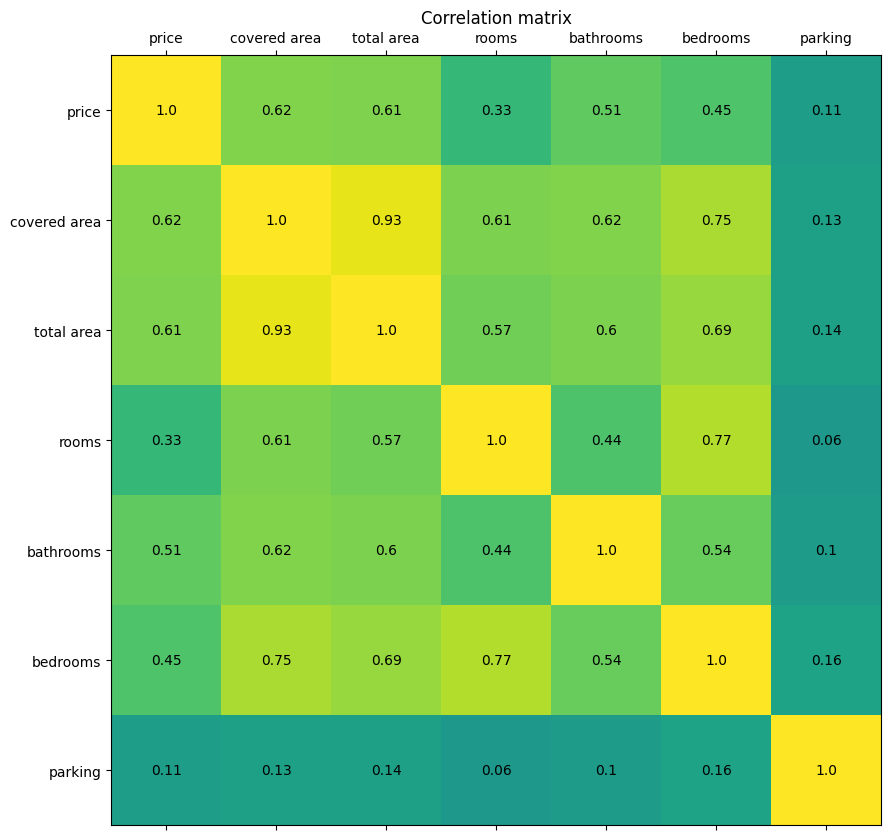

In [139]:
corr = df_pesos_data[columns_to_analize].rename(columns=columns_renames).corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr, vmin=-1, vmax=1)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        c = corr.iloc[j,i]
        ax.text(i, j, str(round(c, 2)), va='center', ha='center')

plt.title('Correlation matrix')

plt.show()

We could see that the price is highly correlated with the area and rooms but are less correlated with the parking.

The rooms and bedrooms are highly correlated, and it makes sense because the bedrooms are a subset of the rooms.

# Location

Let's see the distribution of the price of the apartment in function of the location.

In [25]:
locations = df_pesos_data.location.unique()

In [143]:
print('Some Locations')
for location in locations[:10]:
    print(f'    - {location}')

Some Locations
    - Centro / Microcentro, Capital Federal
    - Caballito, Capital Federal
    - Miraflores (Funes Hill), Zona 13
    - Alto Alberdi, Córdoba
    - Lomas de Zamora, GBA Sur
    - Núñez, Capital Federal
    - Flores, Capital Federal
    - La Plata, La Plata
    - Palermo, Capital Federal
    - Centro, Córdoba


There are two levels of location, the first one could be interpreted as the neighborhood and the second one as the city.

In [140]:
df_pesos_data.loc[:, 'neighborhood'] = df_pesos_data.location.apply(lambda x: x.split(',')[0])
df_pesos_data.loc[:, 'city'] = df_pesos_data.location.apply(lambda x: x.split(',')[1])

In [144]:
neighborhoods = df_pesos_data.neighborhood.unique()

print('Some Neighborhoods')
for neighborhood in neighborhoods[:10]:
    print(f'    - {neighborhood}')

Some Neighborhoods
    - Centro / Microcentro
    - Caballito
    - Miraflores (Funes Hill)
    - Alto Alberdi
    - Lomas de Zamora
    - Núñez
    - Flores
    - La Plata
    - Palermo
    - Centro


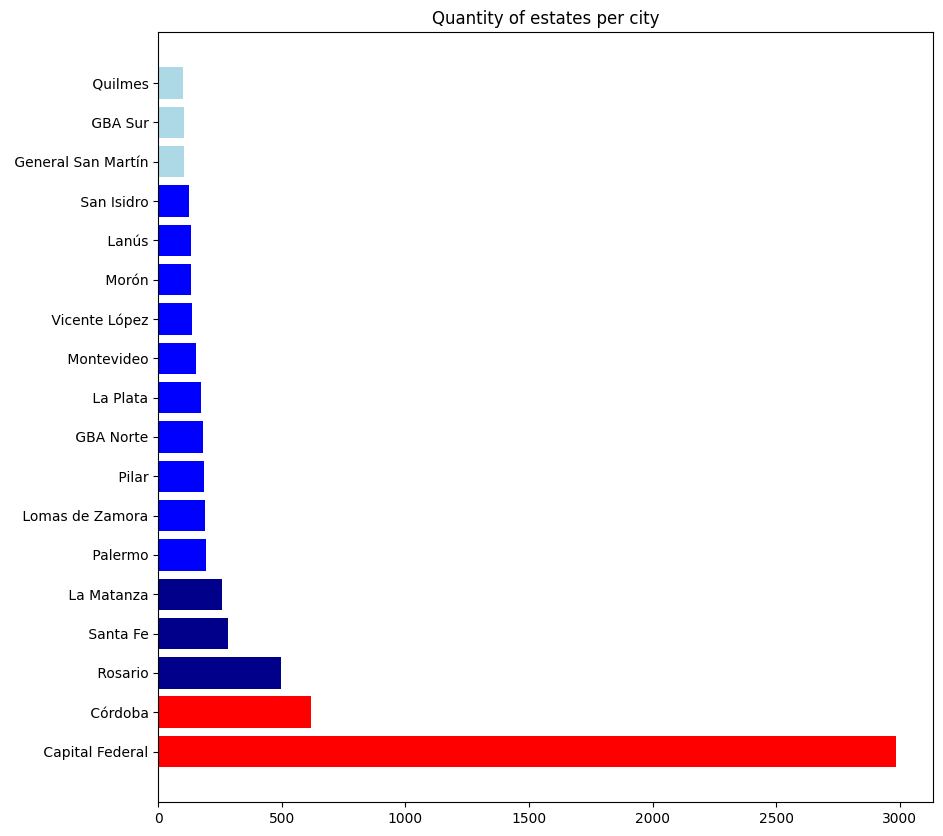

In [145]:
cities_quantity = df_pesos_data.city.value_counts()

cities_quantity = cities_quantity[cities_quantity > 100]


fig, ax = plt.subplots(figsize=(10, 10))


ax.barh(cities_quantity.index, cities_quantity.values, color='lightblue')

ax.barh(cities_quantity[cities_quantity > 120].index, cities_quantity[cities_quantity > 120].values, color='blue')

ax.barh(cities_quantity[cities_quantity > 200].index, cities_quantity[cities_quantity > 200].values, color='darkblue')

ax.barh(cities_quantity[cities_quantity > 500].index, cities_quantity[cities_quantity > 500].values, color='red')


plt.title('Quantity of estates per city')

plt.show()

There are many aparments in CABA and Córdoba.

Buenos Aires is subdivided in zones so that Capital Federal is more reprented than we can see in the plot.

We can see that zones like Palermo, Vicente López and San Isidro are zones that belong to the Capital Federal so there are more apartments in these zones.

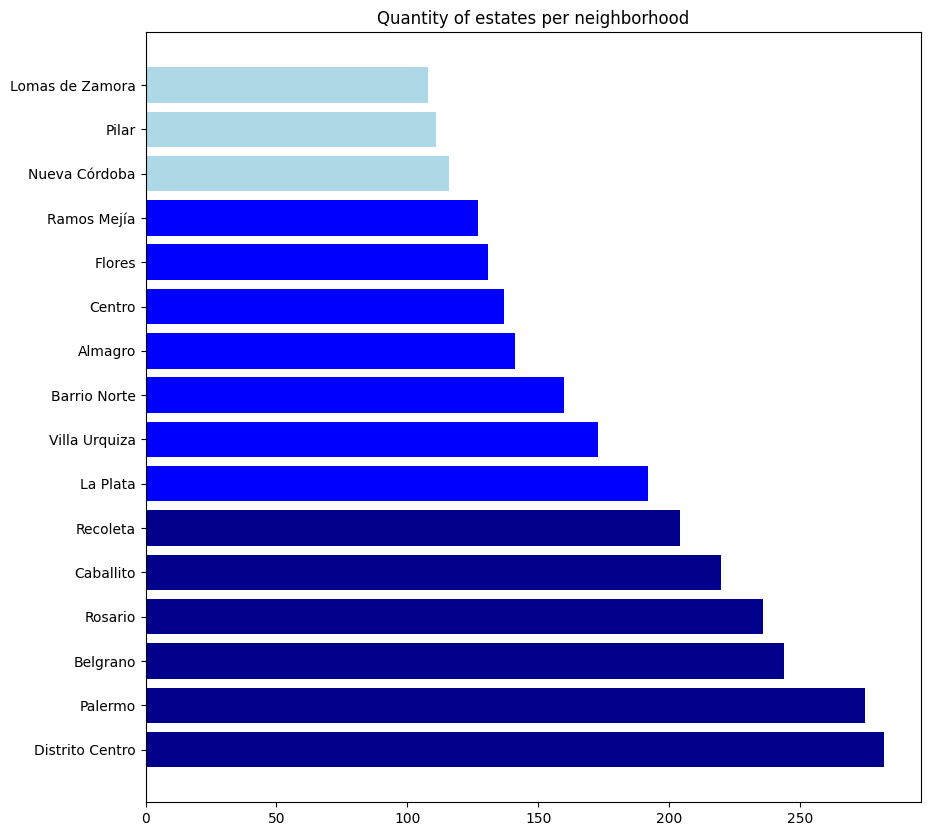

In [147]:
neighborhoods_quantity = df_pesos_data.neighborhood.value_counts()

neighborhoods_quantity[:10]

neighborhoods_quantity = neighborhoods_quantity[neighborhoods_quantity > 100]

fig, ax = plt.subplots(figsize=(10, 10))


ax.barh(neighborhoods_quantity.index, neighborhoods_quantity.values, color='lightblue')

ax.barh(neighborhoods_quantity[neighborhoods_quantity > 120].index, neighborhoods_quantity[neighborhoods_quantity > 120].values, color='blue')

ax.barh(neighborhoods_quantity[neighborhoods_quantity > 200].index, neighborhoods_quantity[neighborhoods_quantity > 200].values, color='darkblue')

ax.barh(neighborhoods_quantity[neighborhoods_quantity > 500].index, neighborhoods_quantity[neighborhoods_quantity > 500].values, color='red')


plt.title('Quantity of estates per neighborhood')

plt.show()



There are 5 neighborhoods that belong to the Capital Federal in the top 5.

# Analysis by zone

Let's see the distribution of the price of the apartment in function of the zone.

We will analyze the apartments in the top 10 neighboorhoods with more apartments.

In [31]:
neigborhoods_to_analize = neighborhoods_quantity[:10].index

In [32]:
df_analize = df_pesos_data[df_pesos_data.neighborhood.isin(neigborhoods_to_analize)]

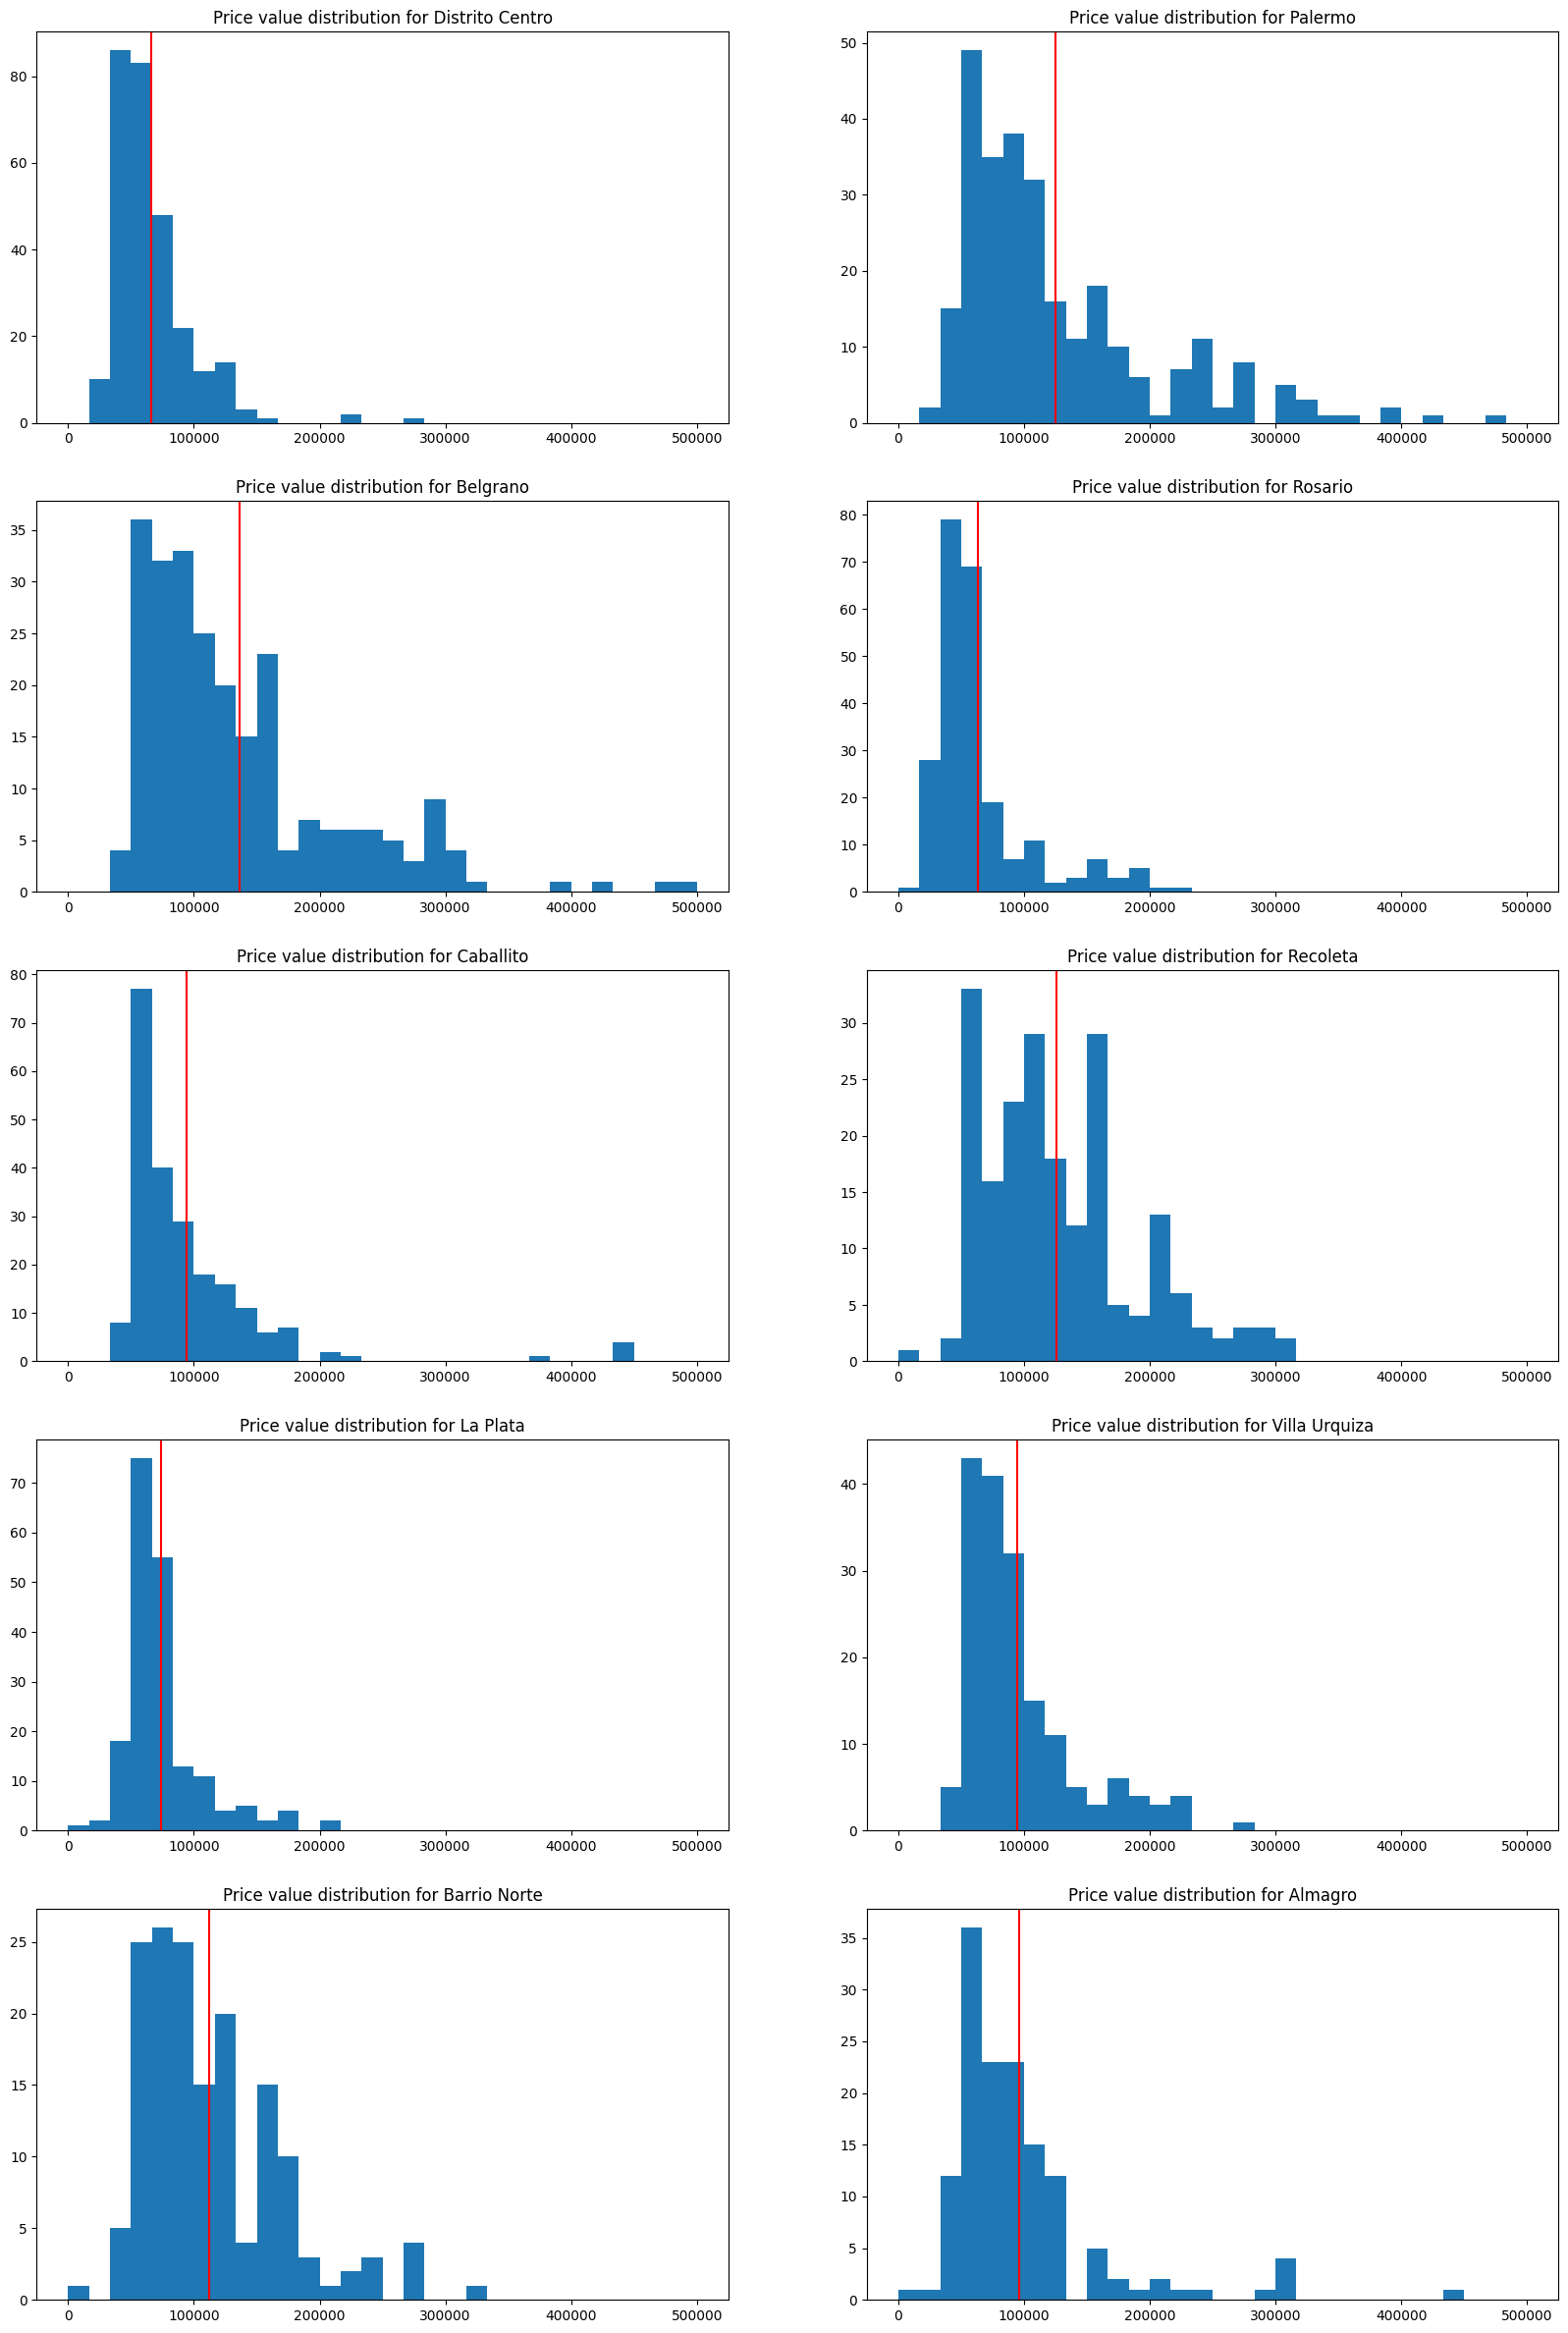

In [33]:
fig, axs = plt.subplots(5, 2, figsize=(20, 30))

for i, neighborhood in enumerate(neigborhoods_to_analize):

    df_neighborhood = df_analize[df_analize.neighborhood == neighborhood]

    axs[i//2, i%2].hist(df_neighborhood['price_value'], bins=30, range=(0, 500000))
    axs[i//2, i%2].set_title(f'Price value distribution for {neighborhood}')
    axs[i//2, i%2].axvline(df_neighborhood['price_value'].mean(), color='red')


plt.show()

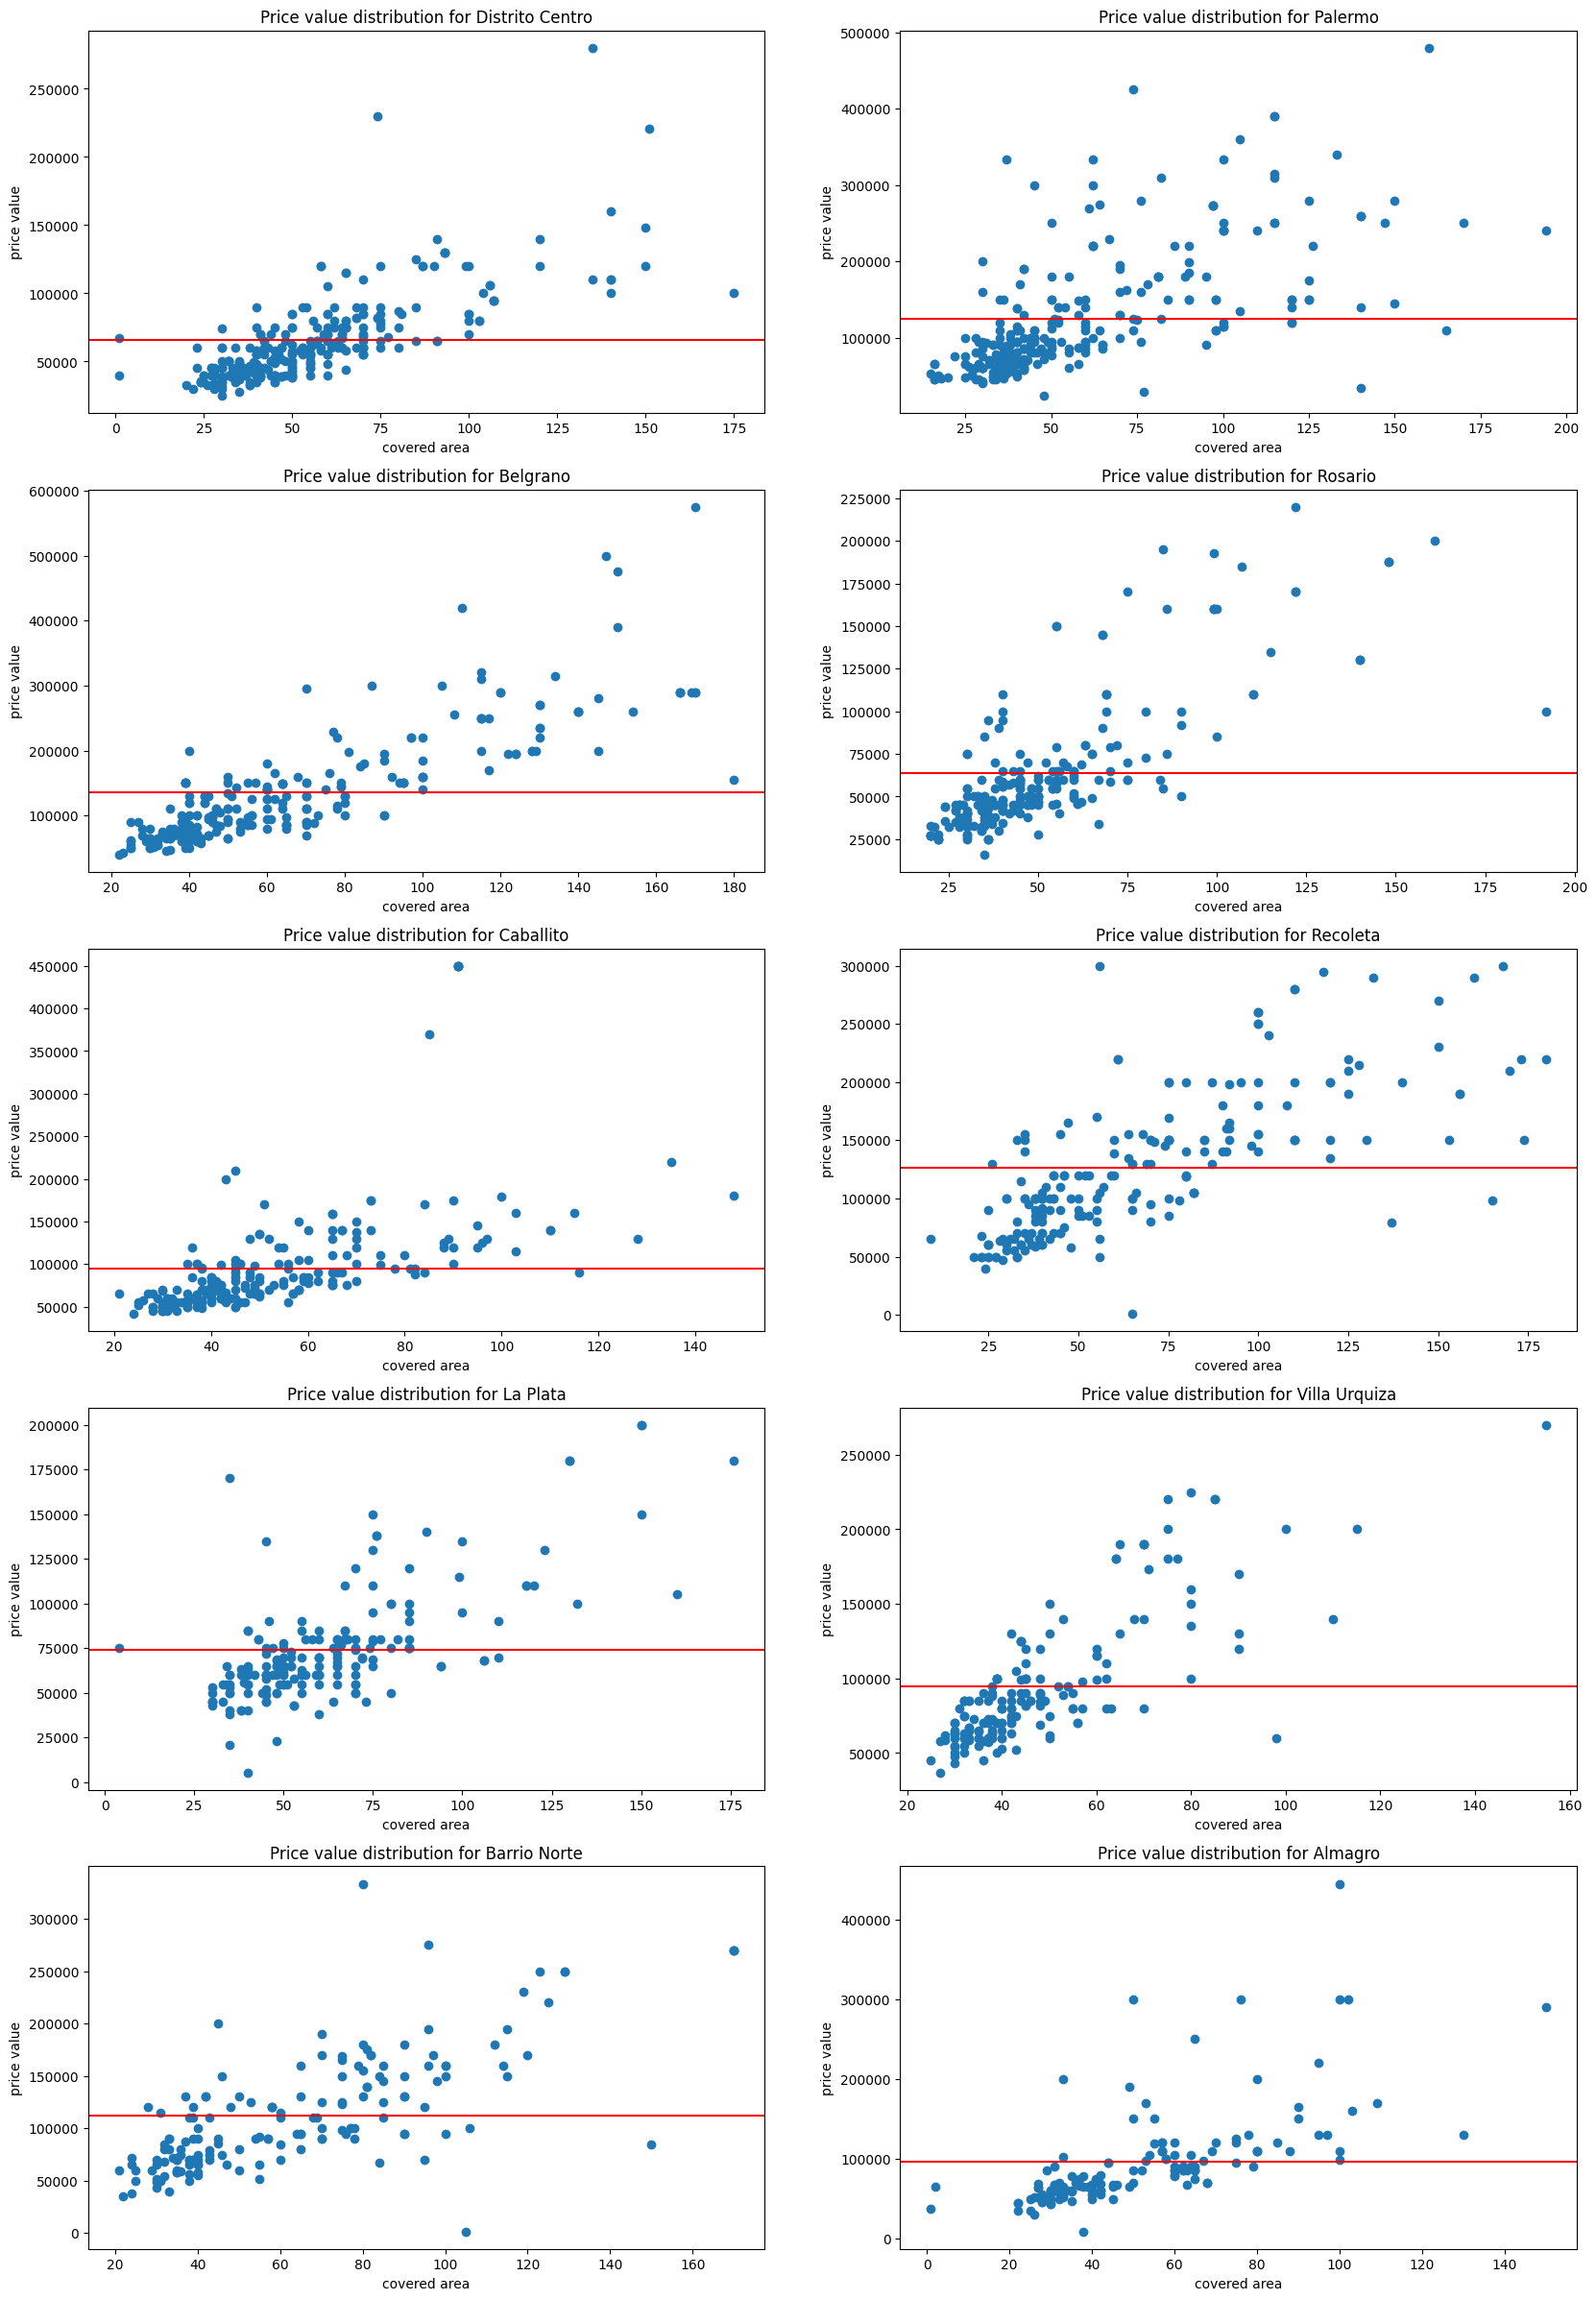

In [34]:
fig, axs = plt.subplots(5, 2, figsize=(20, 30))

for i, neighborhood in enumerate(neigborhoods_to_analize):

    df_neighborhood = df_analize[df_analize.neighborhood == neighborhood]

    axs[i//2, i%2].scatter(df_neighborhood['covered_area'], df_neighborhood['price_value'])
    axs[i//2, i%2].set_title(f'Price value distribution for {neighborhood}')
    axs[i//2, i%2].axhline(df_neighborhood['price_value'].mean(), color='red')


    axs.flat[i].set(xlabel='covered area', ylabel='price value')

plt.show()

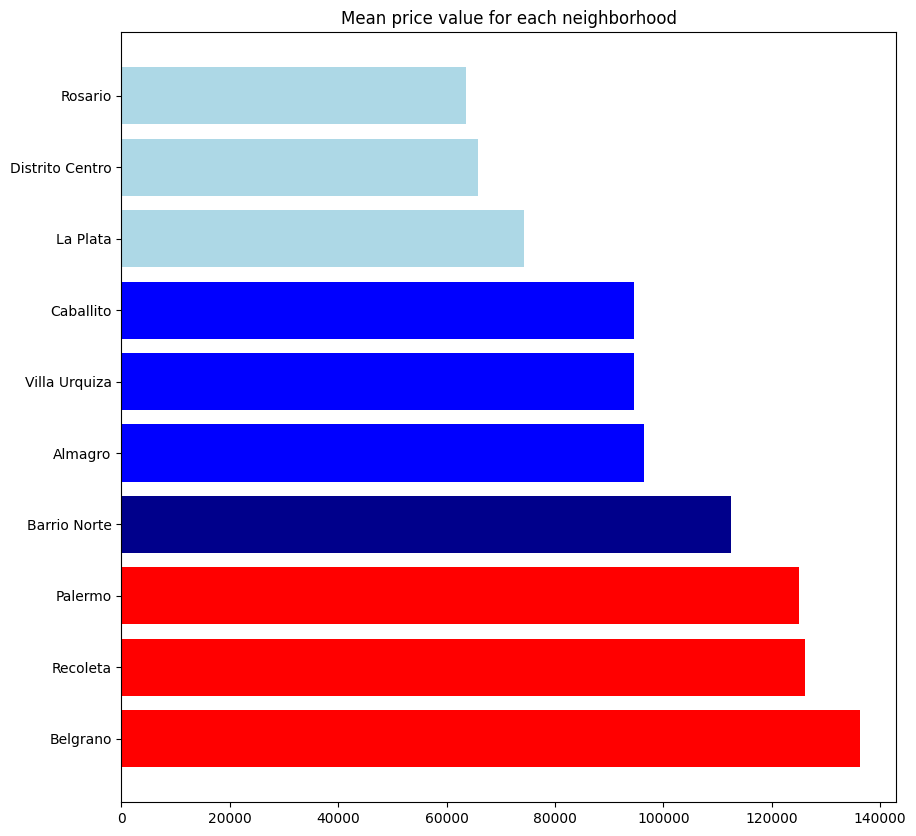

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

df_neighborhoods_mean_price = df_analize.groupby('neighborhood').price_value.mean().sort_values(ascending=False)

ax.barh(df_neighborhoods_mean_price.index, df_neighborhoods_mean_price.values, color='lightblue')


first_color_bound = 80000
second_color_bound = 100000
third_color_bound = 120000

ax.barh(df_neighborhoods_mean_price[df_neighborhoods_mean_price > first_color_bound].index, df_neighborhoods_mean_price[df_neighborhoods_mean_price > first_color_bound].values, color='blue')

ax.barh(df_neighborhoods_mean_price[df_neighborhoods_mean_price > second_color_bound].index, df_neighborhoods_mean_price[df_neighborhoods_mean_price > second_color_bound].values, color='darkblue')

ax.barh(df_neighborhoods_mean_price[df_neighborhoods_mean_price > third_color_bound].index, df_neighborhoods_mean_price[df_neighborhoods_mean_price > third_color_bound].values, color='red')

plt.title('Mean price value for each neighborhood')

plt.show()

We can see that the price of the apartments in the north of Buenos Aires is higher than the price of the rest of the apartments as it is expected.

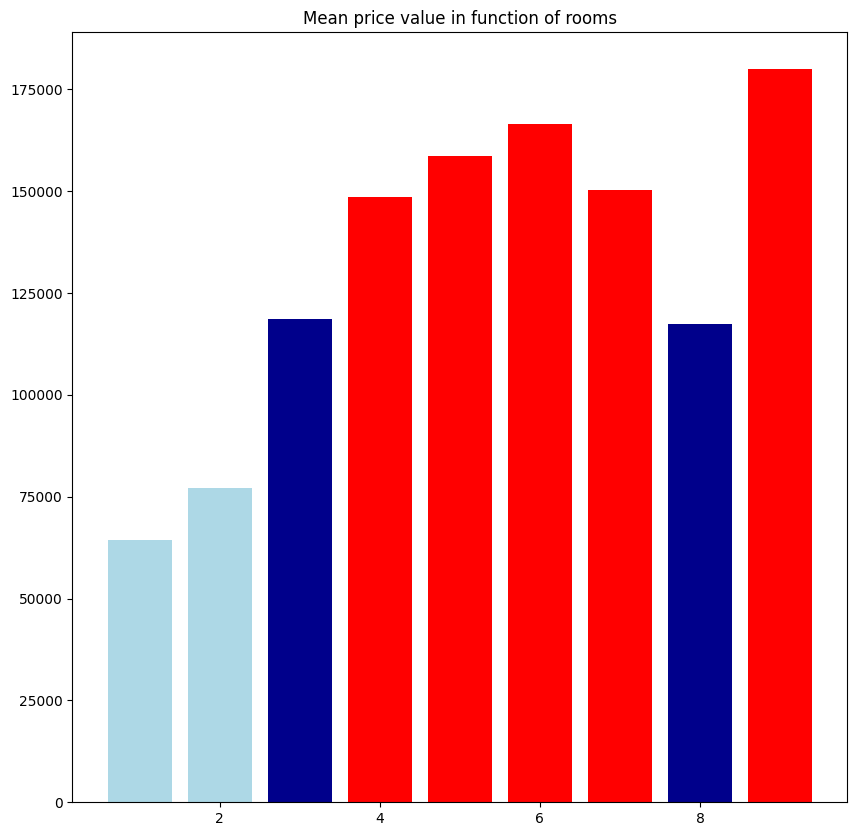

In [126]:
fig, ax = plt.subplots(figsize=(10, 10))

df_rooms_mean_price = df_analize.groupby('rooms_0').price_value.mean().sort_values(ascending=False)

ax.bar(df_rooms_mean_price.index, df_rooms_mean_price.values, color='lightblue')


first_color_bound = 80000
second_color_bound = 100000
third_color_bound = 120000

ax.bar(df_rooms_mean_price[df_rooms_mean_price > first_color_bound].index, df_rooms_mean_price[df_rooms_mean_price > first_color_bound].values, color='blue')

ax.bar(df_rooms_mean_price[df_rooms_mean_price > second_color_bound].index, df_rooms_mean_price[df_rooms_mean_price > second_color_bound].values, color='darkblue')

ax.bar(df_rooms_mean_price[df_rooms_mean_price > third_color_bound].index, df_rooms_mean_price[df_rooms_mean_price > third_color_bound].values, color='red')

plt.title('Mean price value in function of rooms')

plt.show()

As we expected, the price of the apartments increases with the rooms quantity.

The decrease of the price in the apartments with 8 rooms maybe is because there are few apartments with 8 rooms.

Let's see the distribution of the price of the apartment in function of parking quantity.

We will assume that the parking quantity of the nan values is 0.

In [149]:
df_analize.parking_0.fillna(0, inplace=True)

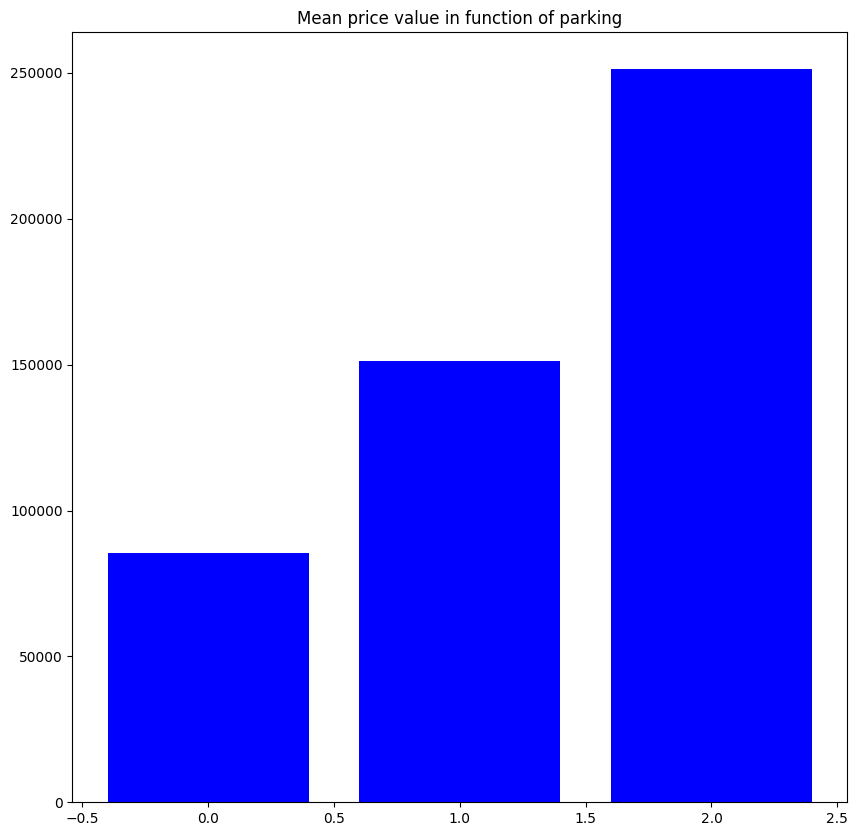

In [150]:
fig, ax = plt.subplots(figsize=(10, 10))

df_parking_mean_price = df_analize.groupby('parking_0').price_value.mean().sort_values(ascending=False)

ax.bar(df_parking_mean_price.index, df_parking_mean_price.values, color='blue')

plt.title('Mean price value in function of parking')

plt.show()

The price of the apartments seems to increase linearly with the parking spaces quantity.

# Predictive Analysis

We will try to use a machine learning model to predict the price of an apartment for each neighborhood.

The features that we are going to use will be the total area, covered area, rooms, bathrooms and parking.

Consider that as a proof of concept.

In [37]:
columns_to_train = ['covered_area', 'total_area', 'rooms_0', 'bathrooms_0', 'parking_0']

In [38]:
columns = columns_to_train + ['price_value', 'neighborhood', 'city']

In [39]:
df_train = df_analize[columns].dropna(subset=columns_to_train)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [41]:
def model_and_metrics(model, X_test, y_test):
    model_dict = {}
    model_dict['metrics'] = {}

    model_dict['model'] = model
    model_dict['metrics'] = {}
    model_dict['metrics']['RMSE'] = mean_squared_error(y_test, model.predict(X_test), squared=False)
    model_dict['metrics']['MAE'] = mean_absolute_error(y_test, model.predict(X_test))

    return model_dict

In [112]:
models = {}

scaler = StandardScaler()
y_scaler = StandardScaler()

scaler.fit(df_train[columns_to_train].values)

y_scaler.fit(df_train.price_value.values.reshape(-1, 1))



for neighborhood in neigborhoods_to_analize:

    models[neighborhood] = {}

    df_neighborhood = df_train[df_train.neighborhood == neighborhood]

    X = df_neighborhood[columns_to_train].values
    y = df_neighborhood.price_value.values

    X = scaler.transform(X)
    y = y_scaler.transform(y.reshape(-1, 1)).ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    lr = LinearRegression()

    lr.fit(X_train, y_train)

    models[neighborhood]['Linear Regression'] = model_and_metrics(lr, X_test, y_test)

    rf = RandomForestRegressor(n_estimators=1000, random_state=0, max_depth=4)

    rf.fit(X_train, y_train)

    rf_dict = model_and_metrics(rf, X_test, y_test)

    models[neighborhood]['Random Forest'] = rf_dict

    mlp = MLPRegressor(random_state=1, max_iter=5000, hidden_layer_sizes=(10, 10), early_stopping=True, validation_fraction=0.1, learning_rate_init=0.001, activation='relu')

    mlp.fit(X_train, y_train)

    mlp_dict = model_and_metrics(mlp, X_test, y_test)

    models[neighborhood]['MLP'] = mlp_dict


In [113]:
df_metrics = pd.DataFrame(columns=['neighborhood', 'model', 'RMSE', 'MAE'])

for neighborhood in models.keys():
    for model in models[neighborhood].keys():

        df_metrics = df_metrics.append({'neighborhood': neighborhood, 'model': model, 'RMSE': models[neighborhood][model]['metrics']['RMSE'], 'MAE': models[neighborhood][model]['metrics']['MAE']}, ignore_index=True)

In [114]:
df_metrics = df_metrics.set_index(['neighborhood', 'model'])

# Metrics

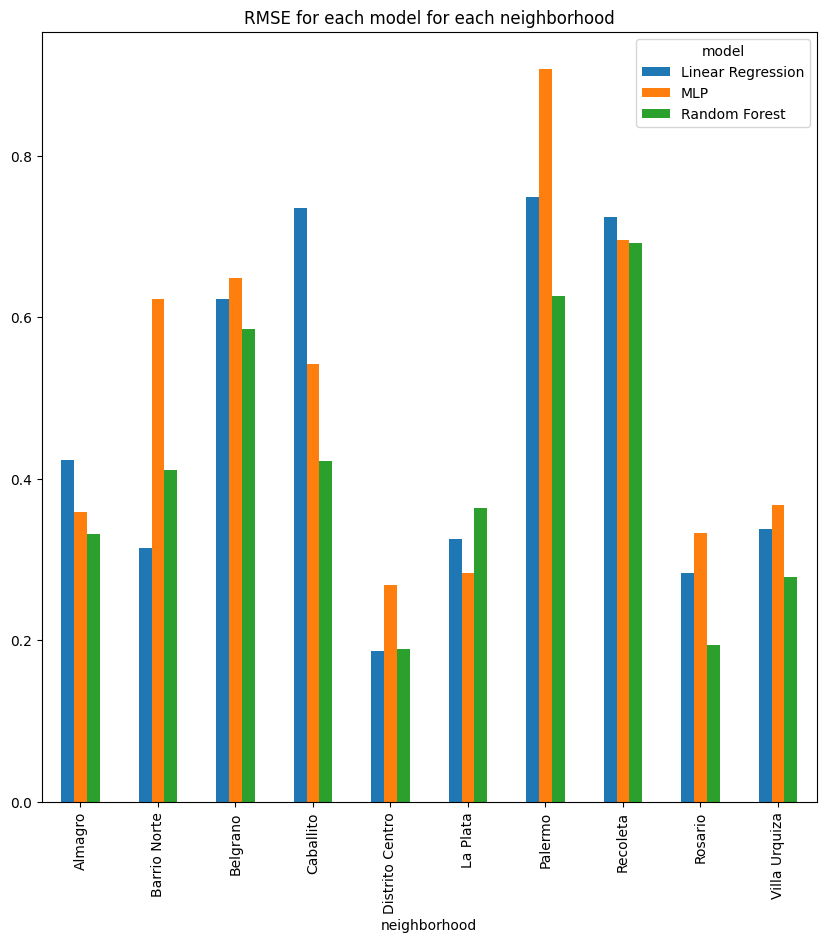

In [115]:
fig, ax = plt.subplots(figsize=(10, 10))

df_metrics.loc[:, 'RMSE'].unstack().plot.bar(ax=ax)

plt.title('RMSE for each model for each neighborhood')

plt.show()


In [116]:
def plot_predictions(sample_apartment, model_name, X_scaler, y_scaler, neighborhoods):

    fig, ax = plt.subplots(figsize=(10, 10))

    for neighborhood in neighborhoods:

        predictions = models[neighborhood][model_name]['model'].predict(X_scaler.transform(sample_apartment[columns_to_train].values))

        predictions = y_scaler.inverse_transform(predictions.reshape(-1, 1)).ravel()

        ax.plot(sample_apartment.covered_area, predictions, label=neighborhood)

    ax.legend()

    ax.set_title(f'{model_name} predictions for different neighborhoods')

    ax.set_xlabel('covered area')

    ax.set_ylabel('price value')

    plt.show()

In [117]:
sample_apartment = pd.DataFrame({
    'covered_area': np.arange(0, 200, 1),
    'total_area': np.arange(0, 200, 1),
    'rooms_0': 2,
    'bathrooms_0': 1,
    'parking_0': 0
})

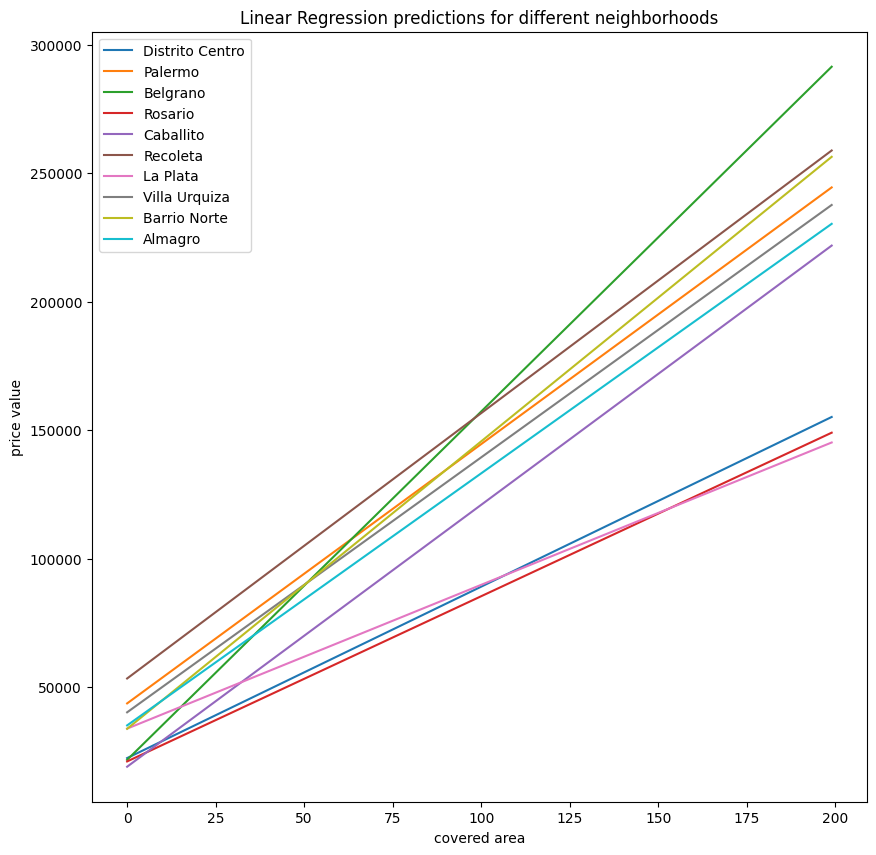

In [118]:
plot_predictions(sample_apartment, 'Linear Regression', scaler, y_scaler, neigborhoods_to_analize)

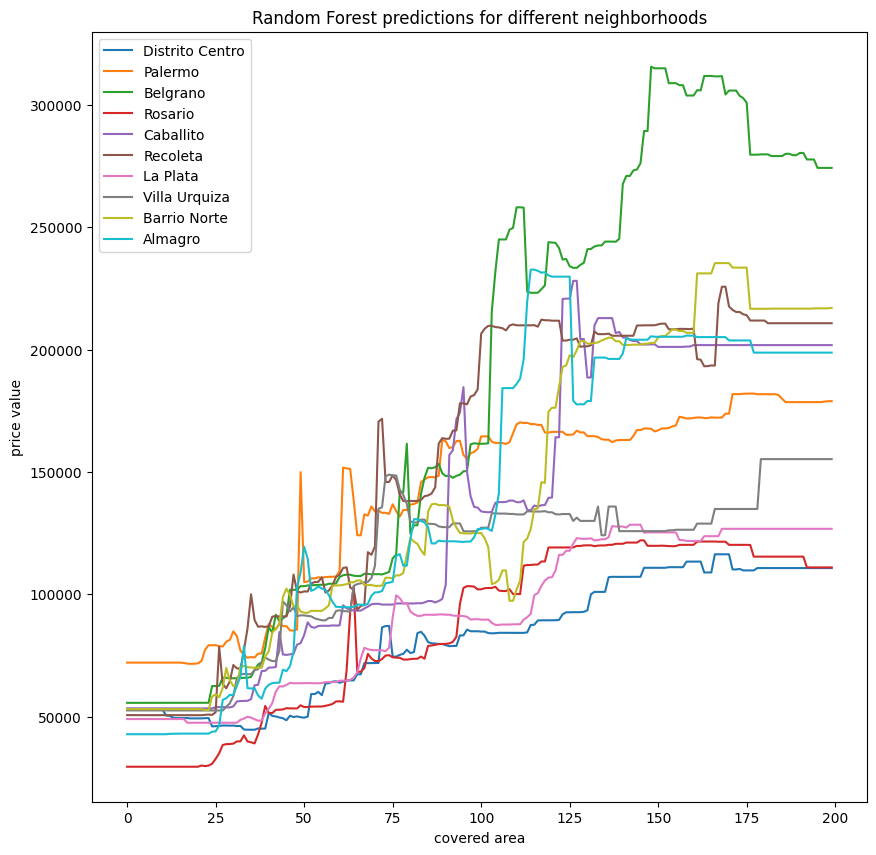

In [119]:
plot_predictions(sample_apartment, 'Random Forest', scaler, y_scaler, neigborhoods_to_analize)

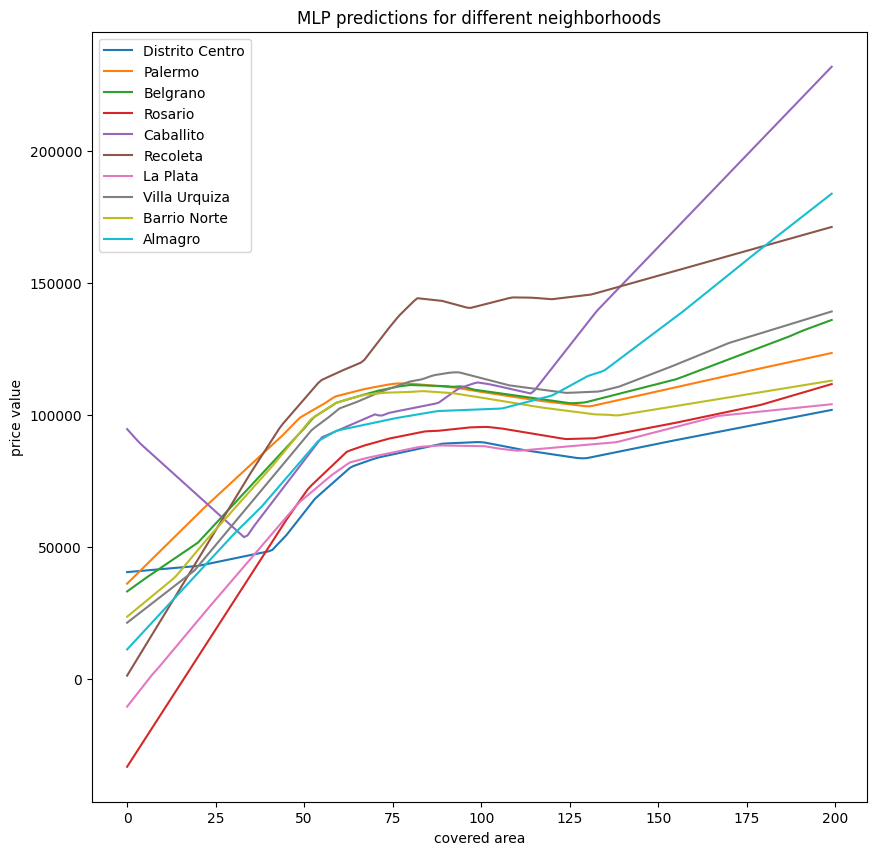

In [120]:
plot_predictions(sample_apartment, 'MLP', scaler, y_scaler, neigborhoods_to_analize)

We could see how are the predictions for one neighborhood for each model.

The predictions are made using all the features that we mentioned before but we will see theses predictions in a covered area vs price plot.

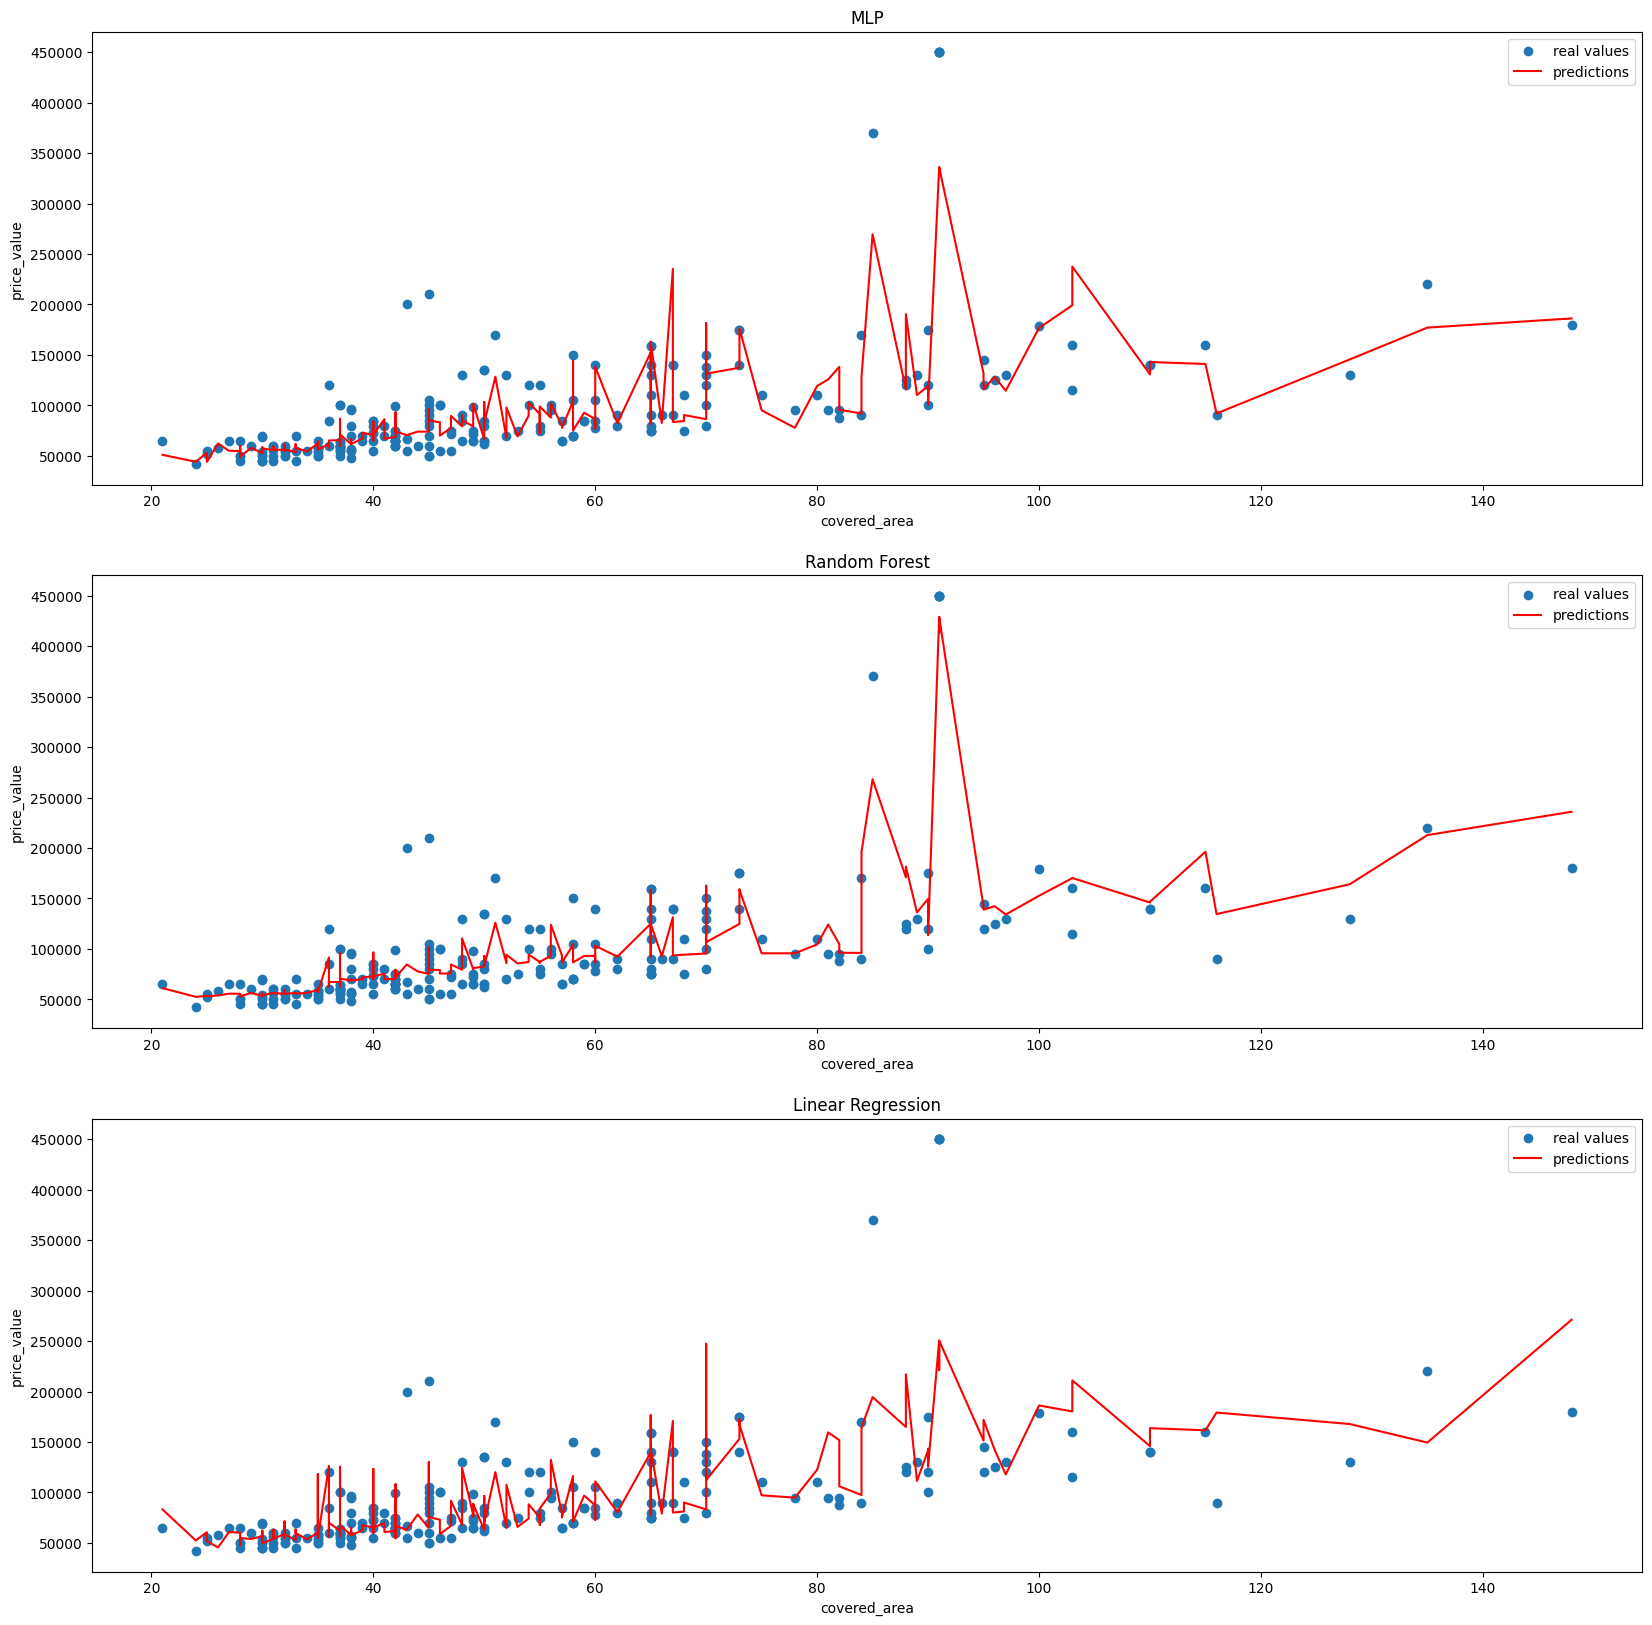

In [121]:

neighborhood = 'Caballito'

belgrano_test = df_train[df_train.neighborhood == neighborhood]

belgrano_test.loc[:, 'mlp_predictions'] = models[neighborhood]['MLP']['model'].predict(scaler.transform(belgrano_test[columns_to_train].values))

belgrano_test.loc[:, 'mlp_predictions'] = y_scaler.inverse_transform(belgrano_test.mlp_predictions.values.reshape(-1, 1)).ravel()

belgrano_test.loc[:, 'rf_predictions'] = models[neighborhood]['Random Forest']['model'].predict(scaler.transform(belgrano_test[columns_to_train].values))

belgrano_test.loc[:, 'rf_predictions'] = y_scaler.inverse_transform(belgrano_test.rf_predictions.values.reshape(-1, 1)).ravel()

belgrano_test.loc[:, 'lr_predictions'] = models[neighborhood]['Linear Regression']['model'].predict(scaler.transform(belgrano_test[columns_to_train].values))

belgrano_test.loc[:, 'lr_predictions'] = y_scaler.inverse_transform(belgrano_test.lr_predictions.values.reshape(-1, 1)).ravel()


fig, ax = plt.subplots(figsize=(20, 20), nrows=3)

def plot_in_axis(ax, df, x, y, predictions, title):

    ax.scatter(df[x], df[y], label='real values')

    ax.plot(df[x], df[predictions], label='predictions', color = 'red')

    ax.set_title(title)

    ax.set_xlabel(x)

    ax.set_ylabel(y)

    ax.legend()


belgrano_test = belgrano_test.sort_values('covered_area')

plot_in_axis(ax[0], belgrano_test, 'covered_area', 'price_value', 'mlp_predictions', 'MLP')

plot_in_axis(ax[1], belgrano_test, 'covered_area', 'price_value', 'rf_predictions', 'Random Forest')

plot_in_axis(ax[2], belgrano_test, 'covered_area', 'price_value', 'lr_predictions', 'Linear Regression')

plt.show()

All the predictors are similar.

# Conclusion

We have seen how is the data and what are the features.

We saw that the north of Buenos Aires is the most expensive zone, and the price of the apartments increases with the rooms quantity, the area and the parking spaces quantity as it is expected.

We saw the correlation between the features and the price of the apartment.

This could be useful to monitor the market and to know if the price of the apartments is increasing or decreasing.

Then we try to predict the price of an apartment for each neighborhood using machine learning models.

This could be useful for people that want to rent an apartment in Argentina and want to know a reasonable price of an apartment in a specific zone.

This analysis could be doing for buying or selling apartments too.


## Idea

Using extra information about the neighborhoods, (for example, the income, the life quality, the facilities, etc.) you can be do an estate scorer that rates the apartments.

This could help people to choose the best apartment for them.